TEMUULEN Bulgan
### [A COMPARATIVE EVALUATION OF TEXT REPRESENTATION TECHNIQUES FOR CONTENT-BASED JOB RECOMMENDATION SYSTEM](https://github.com/temulenbd/jrs)
#### `PART V: COPMPREHESIVE DATA ANALYSIS AND PROJECT INSIGHTS` 
#### *This part of the project includes the coding for the analysis of the datasets and the results from both offline and online evaluations.*

# PART V: COPMPREHESIVE DATA ANALYSIS AND PROJECT INSIGHTS

## 0. GENERAL

### 0.1 Load module

In [1]:
# Load nessesary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import wilcoxon
from scipy.stats import kruskal

### 0.2 Load dataset

In [2]:
# Load datasets.
df_jobseeker = pd.read_csv('data_jobseeker.csv', index_col=None)
df_jobads = pd.read_csv('data_jobads_final.csv', index_col=None)
df_cosine_user1 = pd.read_csv('cosine_user1.csv', index_col=None)
df_cosine_user2 = pd.read_csv('cosine_user2.csv', index_col=None)
df_cosine_user3 = pd.read_csv('cosine_user3.csv', index_col=None)
df_user1_bert = pd.read_csv('user_1_bert_evaluation.csv')
df_user1_tfidf = pd.read_csv('user_1_tfidf_evaluation.csv')
df_user1_word2vec = pd.read_csv('user_1_word2vec_evaluation.csv')
df_user2_bert = pd.read_csv('user_2_bert_evaluation.csv')
df_user2_tfidf = pd.read_csv('user_2_tfidf_evaluation.csv')
df_user2_word2vec = pd.read_csv('user_2_word2vec_evaluation.csv')
df_user3_bert = pd.read_csv('user_3_bert_evaluation.csv')
df_user3_tfidf = pd.read_csv('user_3_tfidf_evaluation.csv')
df_user3_word2vec = pd.read_csv('user_3_word2vec_evaluation.csv')

## 1. EXPLORING DATASETS.

### 1.1 job seekers dataset

In [3]:
# Print the shape and the columns of job seekers' DF.
print("The JOB SEEKER's df has the following shape:", df_jobseeker.shape)
print('The columns of the df are:', ', '.join(df_jobseeker.columns.tolist()))

df_jobseeker

The JOB SEEKER's df has the following shape: (3, 8)
The columns of the df are: participant, data_collection, date, location, preferred_position, education, skill, experience


,participant,data_collection,date,location,preferred_position,education,skill,experience
0,user_1,voice call,2023-12-17 15:30:00,"dublin, ireland",registered nurse,bachelor's degree: critical care nursing,"patient care, wound care, medical procedures, ...",registered nurse: 3 years
1,user_2,voice call,2023-12-27 11:50:00,"dublin, ireland",electrician,"high school diploma, vocational electrician ce...","circuit testing, blueprint reading, fault find...",residential electrician's helper: 1 year
2,user_3,google form,2023-12-31 13:39:00,"dublin, ireland",data analyst,"degree: master of science in data analytics, b...","python, data mining and extraction, data analy...",entry level data analyst: 1 year; data coordin...


*Interpretation:*
The JOB SEEKERS dataframe contains information of three individuals participating in the experiment. The participants are based in the Dublin area, and their data was collected on various dates in December 2023. They shared their job search details through voice calls and Google Forms. Notably, each participant expressed their preferred search for job positions and provided detailed information regarding their education, skills, and work experience.

In [4]:
# Apply minor modifications for further use.
df_jobseeker['combined_info'] = df_jobseeker.education + '. ' + df_jobseeker.skill + '. ' + df_jobseeker.experience + '.'
df_jobseeker.drop(['education', 'skill', 'experience'], axis=1, inplace=True)
df_jobseeker['word_count'] = df_jobseeker['combined_info'].apply(lambda x: len(x.split()))

# Print each participant's details.
for index, row in df_jobseeker.iterrows():
    print('Participant No.'+ str(index+1) + ': ' + row['combined_info'] + '\n')

Participant No.1: bachelor's degree: critical care nursing. patient care, wound care, medical procedures, adult nursing, infection control, diagnostic, time management, communication skills, attention to detail. registered nurse: 3 years.

Participant No.2: high school diploma, vocational electrician certification, construction safety certification. circuit testing, blueprint reading, fault finding, electrical wiring, troubleshooting, equipment inspection, installation, organization, maintenance, diagnostic, independent worker, safety knowledge. residential electrician's helper: 1 year.

Participant No.3: degree: master of science in data analytics, bachelor of science in business administration; certifications: microsoft certified - azure data scientist associate, google data analytics certificate. python, data mining and extraction, data analytics and visualization, etl pipeline, data reporting, database management systems, sql and nosql, machine learning, a/b testing, data governanc

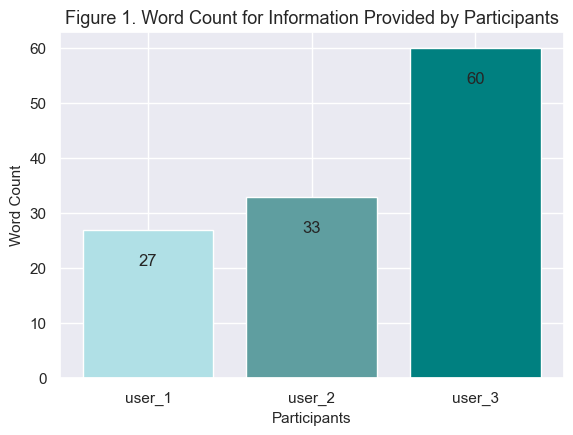

In [5]:
# Plot the word count for the information provided by the participants.
sns.set(context='notebook', style='darkgrid')
plt.figure(figsize=(6.5, 4.5))
bars = plt.bar(df_jobseeker['participant'], df_jobseeker['word_count'], color=['powderblue', 'cadetblue', 'teal'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, 
             height-7, f'{height}', 
             ha='center', va='bottom')

plt.title('Figure 1. Word Count for Information Provided by Participants', fontsize=13)
plt.xlabel('Participants', fontsize=11)
plt.ylabel('Word Count', fontsize=11)

plt.show()

*Interpretation:* After combining the separate information provided by the participants, the resulting string is used to calculate the cosine score. And as it can be seen from the bar graph above, each participant has a different word count, but with a word count less than 100. The longest string belongs to participant no. 3 with 60 words, while the shortest belongs to participant no. 2 with 27 words.


### 1.1 job offers dataset

In [6]:
# Apply minor modifications for further use.
df_jobads['job_description'] = df_jobads['job_description'].str.replace('\n', ' ')
df_jobads = df_jobads.dropna().reset_index(drop=True)
df_jobads['word_count'] = df_jobads['job_description'].apply(lambda x: len(x.split()))

# Print the shape and the columns of job seekers' DF.
print("The JOB ADS' df has the following shape:", df_jobads.shape)
print('The columns of the df are:', ', '.join(df_jobads.columns.tolist()))

df_jobads.head(2)

The JOB ADS' df has the following shape: (1166, 7)
The columns of the df are: title, id, link, date, job_description, label, word_count


,title,id,link,date,job_description,label,word_count
0,assistant director of nursing,sj_3c7e64c7996bb9d6,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"January 10, 2024",silver stream healthcare group offer great emp...,registered_nurse,502
1,clinical nurse manager (cnm),sj_358f1f68cde928c4,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,unknown,create a better future for yourself recruitne...,registered_nurse,231


*Interpretation:* The JOB ADS dataframe contains data from 1166 unique job advertisements, which were collected from Indeed.com on two separate occasions, January 10th and 20th. It consists of six columns, each providing details such as the job title, job ID, page URL, posting date, assigned position label, and a detailed job description. These columns encompass all the relevant information that was available on the website link. It's important to note that certain details like salary, contact information, organisation locations, office location, etc. have been excluded from the job descriptions to comply with ethical standards.

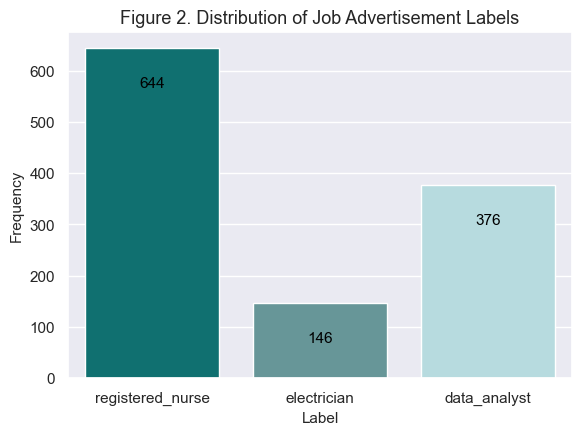

In [7]:
# Plot distribution plot of job ad label.
sns.set(context='notebook', style='darkgrid')
plt.figure(figsize=(6.5, 4.5))
ax = sns.countplot(data=df_jobads, x='label', palette=['teal', 'cadetblue', 'powderblue'])
plt.title('Figure 2. Distribution of Job Advertisement Labels', fontsize=13)
plt.xlabel('Label', fontsize=11)
plt.ylabel('Frequency', fontsize=11)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='top', 
                fontsize=11, color='black',  
                xytext=(0, -20),
                textcoords='offset points')

plt.show()

*Interpretation*: The total count of gathered job ads stands at 1,166, with a considerable majority focused on the registered nurse position. This suggests that, among the three professions collected, registered nurses were the most in-demand on Indeed.com during January. The role of electrician had the fewest listings, totaling 146, while data analyst positions were intermediate, featuring in 376 job advertisements over the same period.

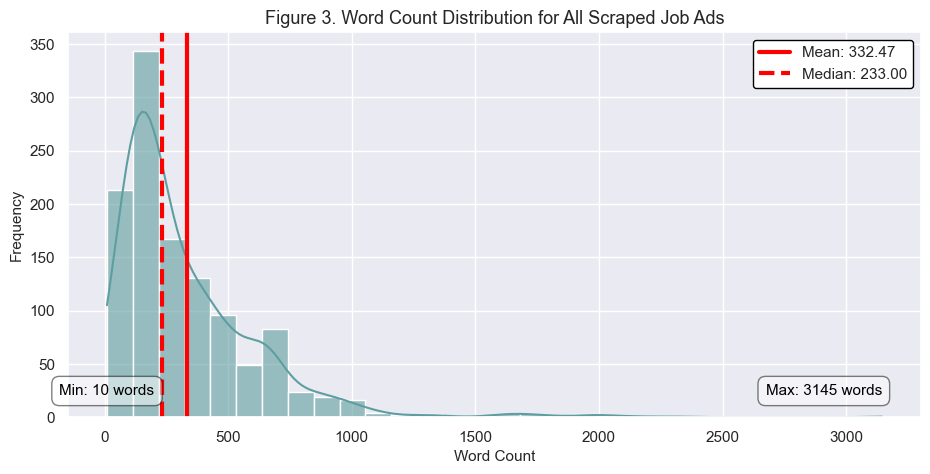

In [8]:
# Plot word count distribution of scraped job ads.
sns.set(style='darkgrid')
plt.figure(figsize=(11, 5))
sns.histplot(df_jobads['word_count'], bins=30, kde=True, color='cadetblue', edgecolor='white', alpha=0.6)
plt.title('Figure 3. Word Count Distribution for All Scraped Job Ads', fontsize=13)
plt.xlabel('Word Count', fontsize=11)
plt.ylabel('Frequency', fontsize=11)

mean_word_count = df_jobads['word_count'].mean()
median_word_count = df_jobads['word_count'].median()
max_word_count = df_jobads['word_count'].max()
min_word_count = df_jobads['word_count'].min()

plt.axvline(mean_word_count, color='red', linestyle='-', linewidth=3, label=f'Mean: {mean_word_count:.2f}')
plt.axvline(median_word_count, color='red', linestyle='--', linewidth=3, label=f'Median: {median_word_count:.2f}')
bottom_y_coord = plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.05
plt.text(max_word_count, bottom_y_coord, f'Max: {max_word_count} words', color='black', fontsize=11,
         ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(min_word_count, bottom_y_coord, f'Min: {min_word_count} words', color='black', fontsize=11,
         ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
plt.legend(frameon=True, facecolor='white', framealpha=1, edgecolor='black')

plt.show()

Interpratetion: The word count for each job ad varies from a minimum of 10 words to a maximum of 3,145 words. The average word count for all job ads is 332, with a median of 233. The lower median value indicates that more than half of the data points fall below the mean. The rightward skew of the mean suggests the influence of high-value outliers or the long tail on the dataset's average.

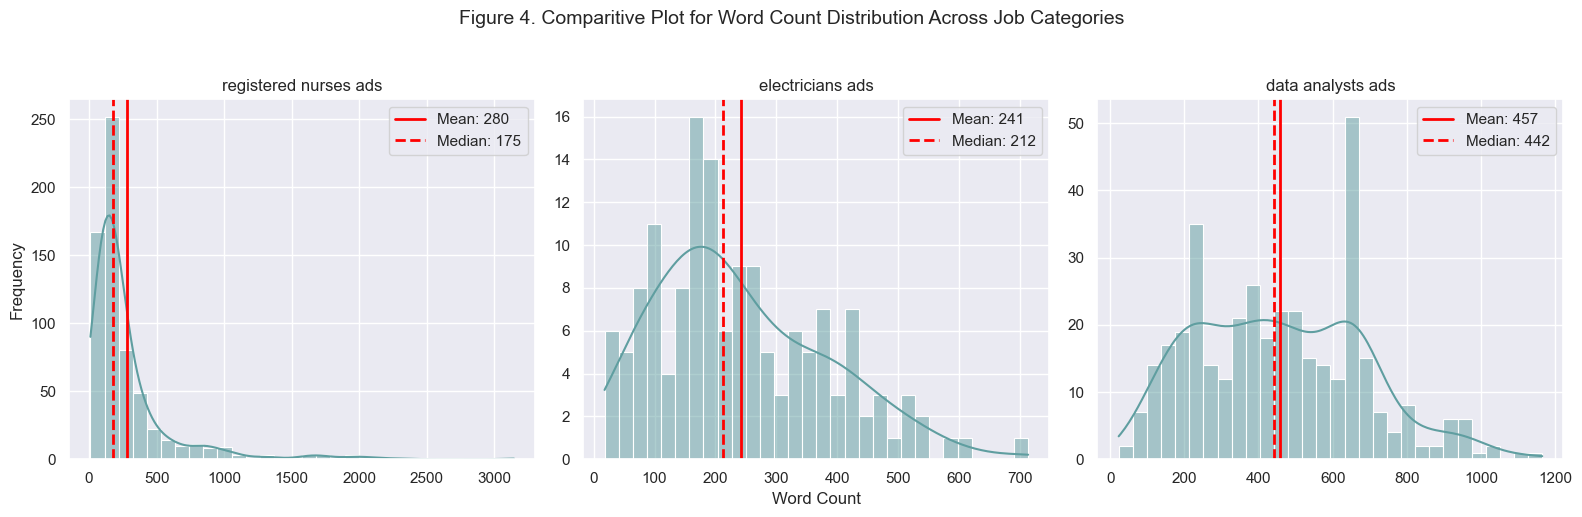

In [9]:
# Plot word count for each scraped position.sns.set(style='darkgrid')
positions = ['registered_nurse', 'electrician', 'data_analyst']
colors = ['cadetblue', 'cadetblue', 'cadetblue']
titles = ['registered nurses ads',
          'electricians ads',
          'data analysts ads']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, (ax, position, color, title) in enumerate(zip(axes, positions, colors, titles)):
    df_subset = df_jobads[df_jobads['label'] == position]
    mean_word_count = df_subset['word_count'].mean()
    median_word_count = df_subset['word_count'].median()
    
    sns.histplot(df_subset['word_count'], bins=30, kde=True, color=color, edgecolor='white', ax=ax)
    ax.axvline(mean_word_count, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_word_count:.0f}')
    ax.axvline(median_word_count, color='red', linestyle='--', linewidth=2, label=f'Median: {median_word_count:.0f}')
    ax.set_title(title)

    if i == 1:
        ax.set_xlabel('Word Count')
    else:
        ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Frequency')
    else:
        ax.set_ylabel('')
    ax.legend()

plt.suptitle('Figure 4. Comparitive Plot for Word Count Distribution Across Job Categories', fontsize=14, y=1.03)
plt.tight_layout()
plt.show()

*Interpretation:* 
The job ads for nursing positions are not only the most in-demand job among the three categories but also have the highest word counts, with some exceeding 3000 words. However, the mean word count for these positions is relatively low at 280, especially when compared to the mean word count for data analyst job positions. Conversely, electrician job ads prove to be the least popular among the three categories on the website, characterised by the lowest word counts and mean word counts.

## 2. EXPLORING COSINE SIMILARITY RESULTS

### 2.1 summary statistics

In [10]:
# Show summary statistics for user1 data (nurse).
summary_stats1 = df_cosine_user1.describe()
print('Summary statistics for <user1 = nurse>:'.upper(), '\n\n', summary_stats1)

SUMMARY STATISTICS FOR <USER1 = NURSE>: 

         word_count     cos_bert  cos_word2vec    cos_tfidf
count  1166.000000  1166.000000   1166.000000  1166.000000
mean    332.466552     0.319900      0.665213     0.141654
std     301.366781     0.388131      0.082701     0.111163
min      10.000000    -0.199576      0.391409     0.000000
25%     137.250000    -0.109479      0.594835     0.056245
50%     233.000000     0.621242      0.658452     0.100525
75%     442.750000     0.678452      0.740086     0.219451
max    3145.000000     0.727966      0.856020     0.529536


*Interpretation*
- ***word_count***: The statistics for word count remain consistent across the DFs for all three users, as each user's cosine similarity was calculated using the same set of job advertisements. The mean word count stands at approximately 332 words, suggesting that the average length of the text extracted from Indeed.com is somewhere around 330 words. Nonetheless, there is a wide variation in the length of job ads, with word counts ranging from as few as 10 to as many as 3145 words, and the standard deviation is about 301 words, suggesting a wide variation in text lengths, from very short to quite lengthy documents. The 25th percentile is around 137 words, the median (50th percentile) is 233 words, and the 75th percentile is about 443 words, confirming the broad spread in document lengths.
- ***cos_bert***: The average cos_bert is 0.3199, indicating a moderate level of semantic similarity across the documents when analysed with BERT. All scores generally range from -0.1996 to 0.728, showing that some document pairs are seen as somewhat dissimilar (with negative values) while others are highly similar. The data exhibits a wide distribution (std of 0.3881), suggesting varied degrees of semantic similarity among document pairs as per BERT's analysis.
- ***cos_word2vec***: A higher average cosine similarity of 0.67 indicates a generally higher level of similarity across documents using Word2Vec embeddings compared to BERT. The standard deviation is lower (0.08) than for BERT, suggesting less variability in similarity scores with Word2Vec. The minimum and percentile values suggest a range of similarities, with most documents being moderately to highly similar.
- ***cos_tfidf***: The average cosine similarity of 0.14 is much lower than for the other two methods, indicating a lower level of textual similarity across documents when using TF-IDF + BoW vectors. A lower standard deviation (0.11) and the range of values suggest that, while there is variability, documents tend to be less similar to each other based on TF-IDF scores.

In [11]:
# Show summary statistics for user2_data (electrician).
summary_stats2 = df_cosine_user2.describe()
print('Summary statistics for <user2 = electrician>:'.upper(), '\n', summary_stats2)

SUMMARY STATISTICS FOR <USER2 = ELECTRICIAN>: 
         word_count     cos_bert  cos_word2vec    cos_tfidf
count  1166.000000  1166.000000   1166.000000  1166.000000
mean    332.466552    -0.025889      0.600000     0.038741
std     301.366781     0.250511      0.057276     0.052500
min      10.000000    -0.242510      0.352230     0.000000
25%     137.250000    -0.172927      0.561716     0.010862
50%     233.000000    -0.090811      0.592295     0.021460
75%     442.750000    -0.065748      0.621538     0.040316
max    3145.000000     0.719622      0.831225     0.329614


*Interpretation*
- ***word_count***: The statistics for word count remain consistent across the DFs for all three users, as each user's cosine similarity was calculated using the same set of job advertisements.
- ***cos_bert***: The average cosine similarity is -0.025, suggesting a slight overall dissimilarity between documents when analyzed with BERT embeddings. This is a extreme contrast to the Nurse's data, which had a positive mean of 0.67, indicating more similarity. The standard deviation is lower (0.25) compared to the Nurse's, indicating less variability in the similarity scores. The range from -0.243 to 0.720 shows some documents are very dissimilar while others are quite similar, albeit the majority lean towards dissimilarity.
- ***cos_word2vec***: The average similarity score of 0.60 suggests a moderate level of similarity between documents, lower than that observed for the Nurse. This indicates that the documents associated with the Electrician share fewer semantic similarities. A relatively low standard deviation (0.057) suggests that the similarity scores are more consistent across the dataset than those for the Nurse. The minimum and maximum values indicate a narrower range of similarity scores compared to the Nurse's data.
- ***cos_tfidf***: The average similarity of 0.039 is significantly lower than that of the Nurse, suggesting that the documents are generally quite dissimilar based on the commonality and importance of terms. The standard deviation and the range of values indicate a relatively low variability in similarity scores, with most documents being less similar to each other.

In [12]:
# Show summary statistics for user3_data (for user 'data analyst').
summary_stats3 = df_cosine_user3.describe()
print('Summary statistics for <user3 = data analyst>:'.upper(), '\n\n', summary_stats3)

SUMMARY STATISTICS FOR <USER3 = DATA ANALYST>: 

         word_count     cos_bert  cos_word2vec    cos_tfidf
count  1166.000000  1166.000000   1166.000000  1166.000000
mean    332.466552     0.156274      0.573476     0.079308
std     301.366781     0.355753      0.071010     0.116556
min      10.000000    -0.164118      0.271790     0.000000
25%     137.250000    -0.107856      0.523822     0.014595
50%     233.000000    -0.068212      0.563920     0.033232
75%     442.750000     0.625446      0.610304     0.101983
max    3145.000000     0.736383      0.828246     0.639187


*Interpretation*
- ***word_count***: The statistics for word count remain consistent across the DFs for all three users, as each user's cosine similarity was calculated using the same set of job advertisements.
- ***cos_bert***: The average cosine similarity of 0.156 indicates a moderate level of similarity between documents, with a positive tilt suggesting some degree of similarity in content or context when analyzed with BERT embeddings. A relatively high standard deviation (0.356) suggests a wide variability in similarity scores, indicating that some document pairs are found to be quite similar while others are more dissimilar. The range from -0.164 to 0.736 shows variability in document similarity, with the maximum score indicating very high similarity in at least some document comparisons.
- ***cos_word2vec***: An average similarity score of 0.573 suggests a moderate level of semantic similarity between documents, albeit lower than observed for the Nurse but higher than the Electrician. The standard deviation (0.071) indicates less variability in similarity scores than BERT, suggesting more consistent semantic relationships across the dataset. The range from 0.272 to 0.828 reflects a spectrum of semantic similarities, from relatively low to very high.
- ***cos_tfidf***: The average similarity of 0.079 is higher than that of the Electrician but lower than the Nurse, indicating a moderate level of dissimilarity based on term frequency and document uniqueness. The relatively high standard deviation (0.117) and the range up to 0.639 indicate that while many documents share few common terms, some pairs share a significant amount of unique terms, leading to higher similarity scores.

Overall, the summary statistics for similarity scores across all three users show that the length of job advertisements can vary significantly, with some ads containing as few as 10 words and others extending up to 3000 words. The BERT model demonstrates the widest range in document similarity, from -0.243 to 0.736, suggesting that it is more capable of identifying both similarity and dissimilarity in job ads compared to the other models. The Word2Vec model, on average, shows the highest mean similarity score across users, implying that it may not be as effective in distinguishing dissimilarities between texts in job ads. This observation might extend to the TF-IDF + BoW model as well, given that their text vector representations did not produce any cosine similarity scores below 0, indicating a potential limitation in detecting dissimilarities. Additionally, both the TF-IDF + BoW and Word2Vec methods exhibit a lower standard deviation in similarity scores compared to BERT, suggesting they maintain a more consistent level of similarity or dissimilarity across the dataset.

### 2.2 distributions

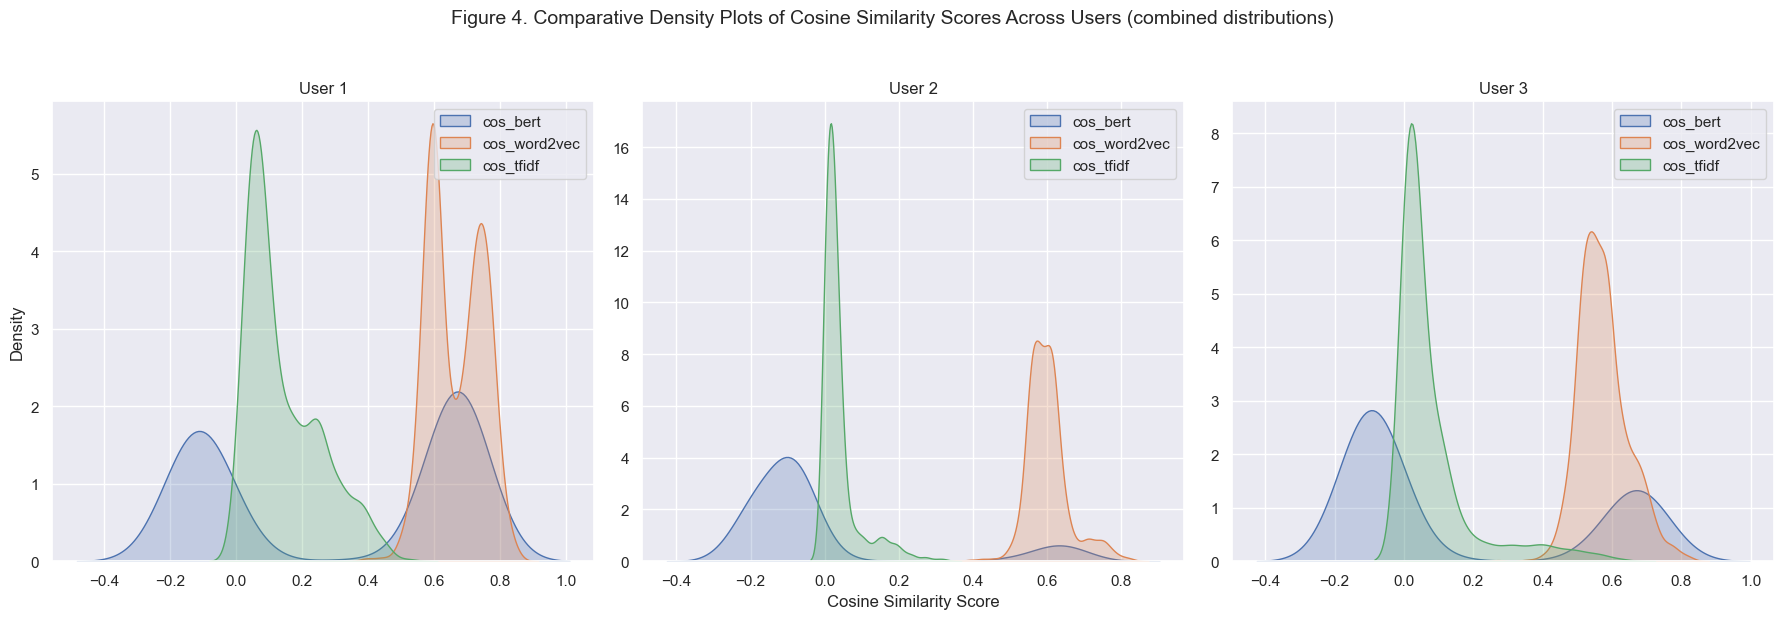

In [13]:
# Plot density plot for cosine similarity score across users.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
dfs = [df_cosine_user1, df_cosine_user2, df_cosine_user3]
titles = ['User 1', 'User 2', 'User 3']

for i, (ax, df, title) in enumerate(zip(axes, dfs, titles)):
    for col in ['cos_bert', 'cos_word2vec', 'cos_tfidf']:
        sns.kdeplot(df[col], label=col, fill=True, ax=ax)
    ax.set_title(title)
    if i == 1:
        ax.set_xlabel('Cosine Similarity Score')
    else:
        ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')
    ax.legend()
    
plt.suptitle('Figure 4. Comparative Density Plots of Cosine Similarity Scores Across Users (combined distributions)', fontsize=14, y=1.03)
plt.tight_layout()
plt.show()

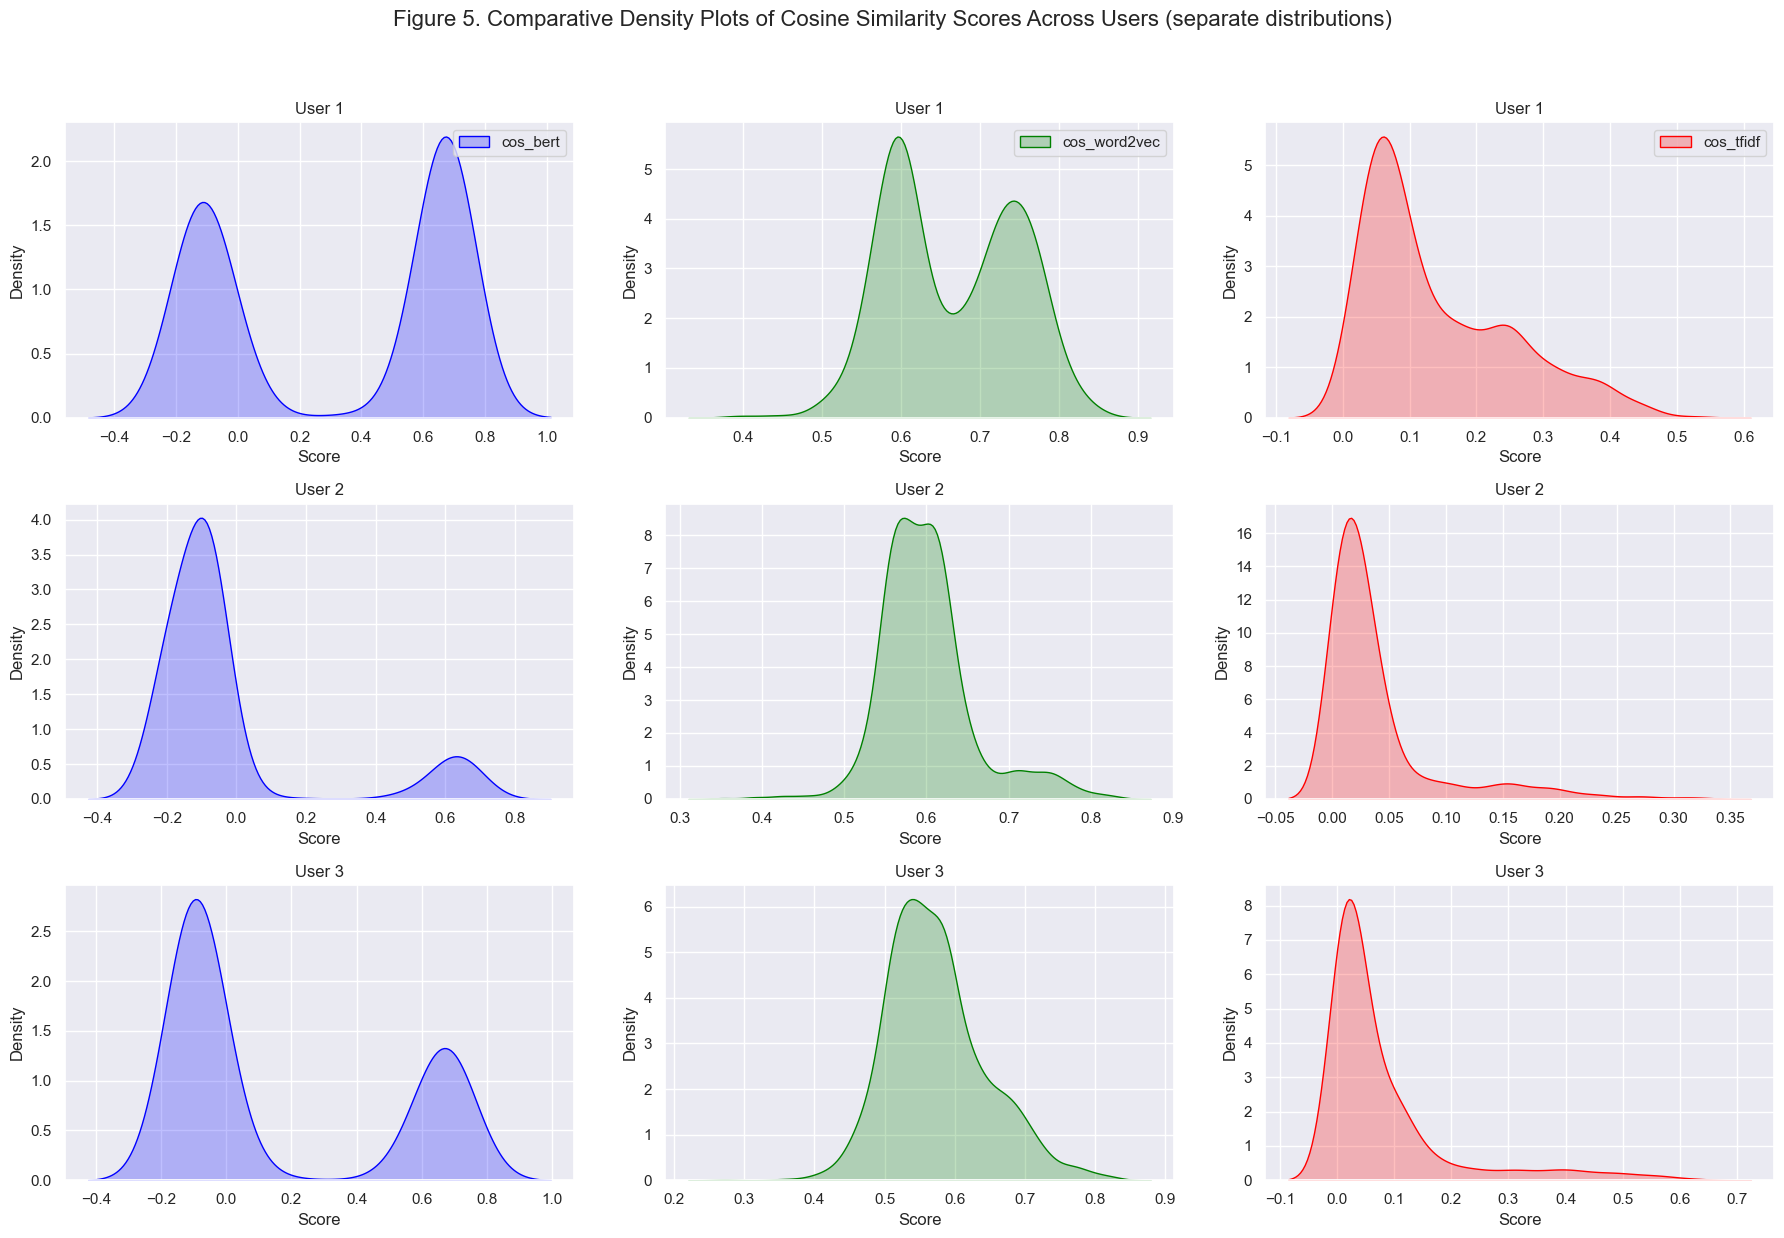

In [14]:
plt.figure(figsize=(18, 12))

dfs = [df_cosine_user1, df_cosine_user2, df_cosine_user3]
user_labels = ['User 1', 'User 2', 'User 3']
scores = ['cos_bert', 'cos_word2vec', 'cos_tfidf']

colors = {'cos_bert': 'blue',
          'cos_word2vec': 'green',
          'cos_tfidf': 'red'}

for i, user_data in enumerate(dfs, start=1):
    for j, score in enumerate(scores, start=1):
        plt.subplot(3, 3, (i-1)*3 + j)
        sns.kdeplot(user_data[score], color=colors[score], fill=True, label=f'{score}')
        plt.title(f'{user_labels[i-1]}')
        plt.xlabel('Score')
        plt.ylabel('Density')
        if i == 1:
            plt.legend()
plt.suptitle('Figure 5. Comparative Density Plots of Cosine Similarity Scores Across Users (separate distributions)', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


*Interpretation*: The density plots plotted above illustrate that across all three users, the cosine similarity scores generated by the BERT model exhibit a bimodal distribution with two distinct peaks and spanning a broader range of intervals compared to the other two models. It suggests that this particular encoding method may possess the ability to capture a richer spectrum of contextual information, varying in levels of semantic similarity. Furthermore, both peaks observed for the BERT model in all three instances are situated on both the negative and positive sides, indicating that the provided text for scoring produces either negative or positive similarity scores. Conversely, the TF-IDF  + BoW cosine score distribution demonstrates a right-skewed pattern across all three instances, suggesting the presence of texts with higher similarity scores as the distribution extends towards the right. In contrast, the Word2vec score distribution exhibits a mixture of one multimodal graph and two unimodal distributions. The secondary peak within the multimodal distribution appears less pronounced. With all peaks clustered between 0.6 and 0.8, it indicates that this method's similarity scoring predominantly generates high degrees of similarity in most cases. Furthermore, the TF-IDF + BoW and Word2Vec techniques producing only positive scores may indicate an inability to effectively differentiate between textual dissimilarities.

### 2.3 correlation

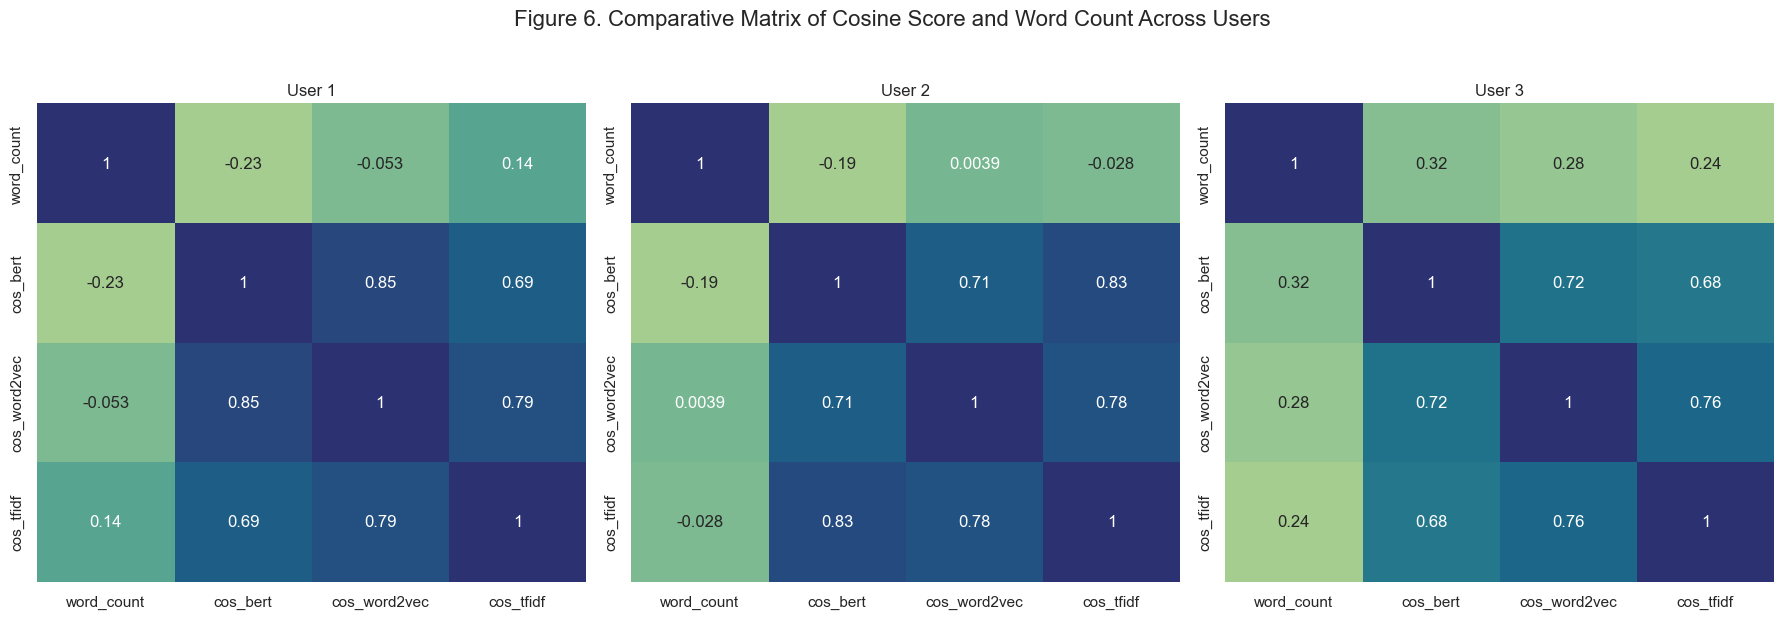

In [15]:
# Create subplots for three users, each with their respective correlation matrix.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ['User 1', 'User 2', 'User 3']

for i, (ax, df, title) in enumerate(zip(axes, dfs, titles)):
    correlation_matrix = df[['word_count', 'cos_bert', 'cos_word2vec', 'cos_tfidf']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='crest', ax=ax, cbar=False)
    ax.set_title(title)
plt.suptitle('Figure 6. Comparative Matrix of Cosine Score and Word Count Across Users', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

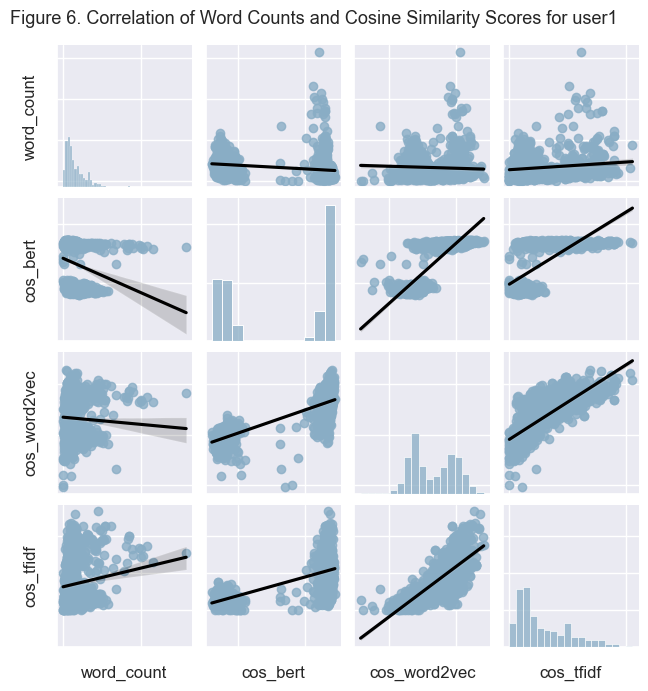

In [16]:
# Create a pair plot for user1.
sns.set_palette('twilight')
pair_plot = sns.pairplot(df_cosine_user1, kind='reg', height=1.7,
             plot_kws={'line_kws':{'color':'black'}})

for ax in pair_plot.axes.flatten():
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
plt.suptitle('Figure 6. Correlation of Word Counts and Cosine Similarity Scores for user1', fontsize=13, y=1.03)
plt.show()

*Interpretation*: The heatmap matrix and correlation plot conducted on each user's data reveal that there is neither a high nor a moderate correlation between the word counts of a text and the cosine similarity scores for all users. This suggests that the length of the text does not significantly impact the calculation of cosine scores. However, there is a high correlation observed among the cosine scores generated by the three techniques. This implies that, while the distribution of scores may vary across different embedding techniques, there appears to be some similarity in the direction of a linear relationship between them.

### 2.4 statistic test

***Kruskal-Wallis test***

Upon observing that the dispersion of cosine similarity scores notably differs across various techniques (BERT, Word2Vec, TF-IDF+BoW), it's crucial to acknowledge that there remains a correlation between them despite these variances. Graphs above, suggests that the scores may not be the same, but they tend to follow similar patterns of linear correlation. Determining which method exhibits significant score variations is crucial for accurate comparisons among the models. As shown in Figure 5, each method displays distributional disparities, encompassing variations in skewness, modalities, and spread. However, to confirm whether these disparities in embedding methods hold statistical significance, conducting a test is necessary. Given the non-normal distribution of the data for each distinct methods, the appropriate test to employ in this scenario is the Kruskal-Wallis test.

The null hypothesis and alternative hypotheses for the Kruskal-Wallis test are as follows:

- $H_0$:   $\mu_b$ = $\mu_w$ = $\mu_t$ (The median cosine similarity scores are the same across all three text embedding methods (BERT, Word2Vec, and TF-IDF).)
- $H_A$:   $\mu_b$ $\neq$ $\mu_w$ $\neq$ $\mu_t$ (At least one text embedding method results in a median cosine similarity score that is significantly different from the others.)
- $\alpha = 0.05$ (A common significance level value)

In [17]:
# Perform a Kruskal-Wallis H test.
cos_bert = df_cosine_user1['cos_bert']
cos_word2vec = df_cosine_user1['cos_word2vec']
cos_tfidf = df_cosine_user1['cos_tfidf']

stat, p = kruskal(cos_bert, cos_word2vec, cos_tfidf)
print('p value is:', p)
print('test statistic value is:', stat)

p value is: 3.7603020540741994e-286
test statistic value is: 1314.4296746171829


In [18]:
# Datasets for Kruskal-Wallis H test.
datasets_cosine = {'BERT': df_cosine_user1['cos_bert'],
                   'Word2Vec': df_cosine_user1['cos_word2vec'],
                   'TF-IDF': df_cosine_user1['cos_tfidf']}

# Custom function to perform Kruskal-Wallis H test and print results.
def test_kruskal_wallis(groups, group_labels):
    stat, p = kruskal(*groups)
    print(f'Kruskal-Wallis H Test: p={p}, statistic={stat}')
    if p < 0.05:
        print('-- H0 rejected\n-- there is a significant difference among groups')
    else:
        print('-- H0 not rejected\n-- no significant difference found among groups')

# Extracting the groups as a list for the function.
groups = list(datasets_cosine.values())
group_labels = list(datasets_cosine.keys())

test_kruskal_wallis(groups, group_labels)

Kruskal-Wallis H Test: p=3.7603020540741994e-286, statistic=1314.4296746171829
-- H0 rejected
-- there is a significant difference among groups


After computation, the *p* score is *3.7603020540741994e-286* and the *test statistics* value is *1314.4296746171829*. Based on the aforementioned values, it is evident that there exists compelling statistical evidence to reject the null hypothesis. It can be concluded that a statistically significant difference exists in the median cosine similarity scores derived from comparing document pairs through various text embedding techniques (BERT, Word2Vec, and TF-IDF+BoW). It also suggests that the choice of embedding method has a significant impact on the cosine similarity scores, and therefore, different embedding methods may not be equivalent in terms of how they represent document similarities.

***Cliff's Delta test***

In [19]:
# Define cliffs_delta function and calculate Cliff's Delta.
def cliffs_delta(x, y):
    n1, n2 = len(x), len(y)
    all_pairs = np.array([a > b for a in x for b in y])
    n_gt = np.sum(all_pairs)
    n_lt = np.sum(~all_pairs)
    return (n_gt - n_lt) / (n1 * n2)

delta_bert_word2vec = cliffs_delta(cos_bert, cos_word2vec)
delta_bert_tfidf = cliffs_delta(cos_bert, cos_tfidf)
delta_word2vec_tfidf = cliffs_delta(cos_word2vec, cos_tfidf)

data = {'BERT': [1.0, delta_bert_tfidf, delta_bert_word2vec],
        'TF-IDF + BoW': [delta_bert_tfidf, 1.0, delta_word2vec_tfidf],
        'Word2Vec': [delta_bert_word2vec, delta_word2vec_tfidf, 1.0]}

labels = ['BERT', 'TF-IDF + BoW', 'Word2Vec']
delta_values = pd.DataFrame(data, index=labels, columns=labels)
delta_values

,BERT,TF-IDF + BoW,Word2Vec
BERT,1.000000,0.105739,-0.433174
TF-IDF + BoW,0.105739,1.000000,0.999803
Word2Vec,-0.433174,0.999803,1.000000


The outcomes of the Kruskal-Wallis test provided compelling statistical support for rejecting the null hypothesis, indicating a significant variance in cosine similarity scores among one of the groups. Nevertheless, this test doesn't quantify the extent or importance of these discrepancies. This is where the Cliff's Delta test proves valuable: it complements the Kruskal-Wallis test by not only pinpointing significantly distinct pairs of groups but also quantifying the magnitude of these differences. Therefore, the calculation of delta scores is crucial for reaching conclusions about the effectiveness of the embedding strategies.

The delta scores span from -1 to 1, with scores closer to 0 indicating minor effects and those nearer to -1 or 1 signifying substantial effects. Once these scores are computed, they can be interpreted using a benchmark guideline that categorizes them as follows:

- negligible (∣d∣ < 0.147): negligible effect size suggests that the difference between the two groups is so small that it is considered insignificant for practical purposes.
- small (0.147 ≤ ∣d∣ < 0.33): small effect size indicates a slight but noticeable difference between the groups, which might be meaningful depending on the context.
- medium (0.33 ≤ ∣d∣ < 0.474): medium effect size reflects a moderate difference that is likely to be of practical significance in many situations.
- large (∣d∣ ≥ 0.474): large effect size implies a substantial difference between the groups, suggesting a strong effect that is very likely to be important in most contexts.

And using this benchmark we can interpret the results of the effect size on our dataset.

1.	**BERT – TF-IDF+BoW** **(0.1057)** This magnitude of Cliff's Delta indicates a negligible effect size, it suggests that the difference in distributions between BERT and TF-IDF+BoW cosine similarity scores is statistically detectable but small in magnitude. The positive value indicates that, on average, BERT tends to yield slightly higher cosine similarity scores than TF-IDF, but the difference is not substantial.
2.	**BERT – Word2Vec** **(-0.4331)**. This delta indicates a medium effect size, it suggests that the difference in distributions between BERT and Word2Vec cosine similarity scores is not only statistically significant but also of a substantial magnitude. The presence of a negative sign in the value suggests that, in most cases, the cosine similarity scores obtained with Word2Vec are larger than those obtained with BERT.
3.	**Word2Vec – TF-IDF+BoW** **(0.9998)**. This value is very close to 1, indicating a very large effect size. It suggests a substantial difference in the distributions of cosine similarity scores between Word2Vec and TF-IDF. The positive value signifies that Word2Vec scores are, on average, substantially higher than those of TF-IDF. Given the magnitude of this effect, it can be interpreted that in almost all comparisons, Word2Vec yields higher cosine similarity scores than TF-IDF.

In summary, by conducting Kruskal-Wallis hypothesis test without incorporating human evaluation, it can be determined that the cosine scores generated through various embedding techniques differ, despite showing some level of correlation. Moreover, upon applying Cliff's Delta test, it was discovered that a substantial discrepancy exists in cosine calculation score between Word2Vec and TF-IDF+BoW, with a moderate difference observed between BERT and Word2Vec models.

## 4. EXPLORING RANKING WITH COSINE SCORE

As far as we know from the previous sections i have three participants who are voluntarely joined to participate in my experiment. These participants had agreed to provide their private information and help me to execute this experiment for person job matching experience and all  volunteer had agreed to evaluate the recommendation by ranking them. And in this subsection 

In [20]:
# The number of total job ads for each lable that were used for the evaluation.
value_counts = {'registered_nurse': 644, 'electrician': 146, 'data_analyst': 376}

### 4.1 Model evaluation

From the information provided in previous sections, it is noted that three participants voluntarily joined the experiment. These participants consented to share their private information and assist in conducting the experiment focused on assessing person-job matching experience. Furthemore, these volunteers agreed to evaluate the recommendations through a ranking process and this subsection will examine the results from both the model and human evaluation for each participant.

***user1 = registered nurse***

In [21]:
# Find the first incorrect label occurrence in the ranking order and calculate the percentage of correct labeling among the top expected count occurrences.
def check_ranking_and_print(df, sort_by, expected_count, label):

    df_sorted = df.sort_values(by=sort_by, ascending=False).reset_index(drop=True)
    first_occurrence_index = df_sorted.loc[df_sorted['label'] != label].index.min()
    
    if pd.isna(first_occurrence_index) or first_occurrence_index != expected_count:
        print(f'The ranking is not precise using {sort_by}.')
        if not pd.isna(first_occurrence_index):
            print(f"The first occurrence of the label other than '{label}' is at index: {first_occurrence_index}")
            print(f"The label at this index is: {df_sorted.loc[first_occurrence_index, 'label']}")
            ideal_df = df_sorted.iloc[:expected_count]
            label_counts = ideal_df['label'].value_counts()
            correct_ads_proportion = label_counts[label] / label_counts.sum()
            correct_ads_percentage = 100 * correct_ads_proportion
            print(f"Percentage of correct labeling: {correct_ads_percentage:.2f}%")
    else:
        print(f'The ranking has performed precisely using {sort_by}.')

In [22]:
# Define costum function to merge the results.
def check_ranking_and_return(df, sort_by, expected_count, label):
    df_sorted = df.sort_values(by=sort_by, ascending=False).reset_index(drop=True)
    first_occurrence_index = df_sorted.loc[df_sorted['label'] != label].index.min()
    
    if pd.isna(first_occurrence_index) or first_occurrence_index != expected_count:
        if not pd.isna(first_occurrence_index):
            ideal_df = df_sorted.iloc[:expected_count]
            label_counts = ideal_df['label'].value_counts()
            correct_ads_proportion = label_counts.get(label, 0) / label_counts.sum()
            correct_ads_percentage = 100 * correct_ads_proportion
            return first_occurrence_index, correct_ads_percentage
        else:
            return np.nan, 100
    else:
        return expected_count, 100

In [23]:
# Check ranking and print relevant information for cosine similarity scores based on BERT embeddings for User 1.
check_ranking_and_print(df_cosine_user1, 'cos_bert', value_counts['registered_nurse'], 'registered_nurse')

The ranking has performed precisely using cos_bert.


In [24]:
# Check ranking and print relevant information for cosine similarity scores based on Word2Vec embeddings for User 1.
check_ranking_and_print(df_cosine_user1, 'cos_word2vec', value_counts['registered_nurse'], 'registered_nurse')

The ranking is not precise using cos_word2vec.
The first occurrence of the label other than 'registered_nurse' is at index: 535
The label at this index is: electrician
Percentage of correct labeling: 95.81%


In [25]:
# Check ranking and print relevant information for cosine similarity scores based on TF-IDF+BoW embeddings for User 1.
check_ranking_and_print(df_cosine_user1, 'cos_tfidf', value_counts['registered_nurse'], 'registered_nurse')

The ranking is not precise using cos_tfidf.
The first occurrence of the label other than 'registered_nurse' is at index: 433
The label at this index is: data_analyst
Percentage of correct labeling: 89.29%


In [26]:
results = {'BERT': (644, 100),
           'Word2Vec': check_ranking_and_return(df_cosine_user1, 'cos_word2vec', value_counts['registered_nurse'], 'registered_nurse'),
           'TF-IDF + BoW': check_ranking_and_return(df_cosine_user1, 'cos_tfidf', value_counts['registered_nurse'], 'registered_nurse'),}

summary_df = pd.DataFrame(results, index=['first incorrect occurrence index', 'correct ranking percentage'])

summary_df


,BERT,Word2Vec,TF-IDF + BoW
first incorrect occurrence index,644,535.000000,433.000000
correct ranking percentage,100,95.807453,89.285714


*Interpratation*: The logic for the first incorrect label occurrence and the total number of incorrect label occurrences were used to determine how well the cosine ranking order worked for each method. As can be seen, the Bert model was able to precisely rank the correct job ads above all incorrect job ads, with a correct ranking percentage of 100. For BERT, the first incorrect occurrence (an ad labelled differently from "registered_nurse") appears at index 644, which implies that all the ads ranked before this index are correctly labelled as 'registered_nurse', showing that BERT's embeddings for similarity measures are highly effective for this particular ranking task. Word2Vec's performance shows the first incorrectly labelled ad appearing much earlier in the list, at index 535. This indicates that while most of the top-ranked ads are correctly labelled, there's a slight drop in precision compared to BERT. The correct ranking percentage is 96%, reflecting this high but not perfect accuracy. It suggests that Word2Vec is effective but slightly less precise than BERT for ensuring that the most relevant ads appear at the top of the ranking. TFIDF + BOW shows the earliest occurrence of an incorrectly labelled ad, at index 433. This method has the lowest correct ranking percentage at 89%, indicating that it is less effective than both BERT and Word2Vec for this specific ranking task.

***user2 = electrician***

In [27]:
check_ranking_and_print(df_cosine_user2, 'cos_bert', value_counts['electrician'], 'electrician')

The ranking is not precise using cos_bert.
The first occurrence of the label other than 'electrician' is at index: 144
The label at this index is: registered_nurse
Percentage of correct labeling: 99.32%


In [28]:
check_ranking_and_print(df_cosine_user2, 'cos_word2vec', value_counts['electrician'], 'electrician')

The ranking is not precise using cos_word2vec.
The first occurrence of the label other than 'electrician' is at index: 71
The label at this index is: registered_nurse
Percentage of correct labeling: 82.88%


In [29]:
check_ranking_and_print(df_cosine_user2, 'cos_tfidf', value_counts['electrician'], 'electrician')

The ranking is not precise using cos_tfidf.
The first occurrence of the label other than 'electrician' is at index: 66
The label at this index is: registered_nurse
Percentage of correct labeling: 89.73%


In [30]:
results = {'BERT': check_ranking_and_return(df_cosine_user2, 'cos_bert', value_counts['electrician'], 'electrician'),
           'Word2Vec': check_ranking_and_return(df_cosine_user2, 'cos_word2vec', value_counts['electrician'], 'electrician'),
           'TF-IDF + BoW': check_ranking_and_return(df_cosine_user2, 'cos_tfidf', value_counts['electrician'], 'electrician')}

summary_df = pd.DataFrame(results, index=['first incorrect occurrence index', 'correct ranking percentage'])

summary_df

,BERT,Word2Vec,TF-IDF + BoW
first incorrect occurrence index,144.000000,71.000000,66.000000
correct ranking percentage,99.315068,82.876712,89.726027


*Interpretation:* The results for user2 indicates that the BERT model again outperforms the other techniques in ranking job ads correctly, with a nearly perfect correct ranking percentage of 99.315068%. The first instance of an incorrect job ad labelling using BERT is observed at index 144, suggesting that all preceding ads were accurately identified. In contrast, the Word2Vec model exhibits its first incorrect label at a significantly earlier index, 71, indicating a decrease in accuracy when compared to the previous result with user1. Despite this, it still achieves a correct ranking percentage of 82.876712%. The TF-IDF + BoW method demonstrates a slightly bad performance than Word2Vec in terms of the index of the first incorrect occurrence, which stands at 66. However, it has a higher correct ranking percentage of 89.726027%. 

***user3 = data analyst***

In [31]:
check_ranking_and_print(df_cosine_user3, 'cos_bert', value_counts['data_analyst'], 'data_analyst')

The ranking is not precise using cos_bert.
The first occurrence of the label other than 'data_analyst' is at index: 373
The label at this index is: electrician
Percentage of correct labeling: 99.73%


In [32]:
check_ranking_and_print(df_cosine_user3, 'cos_word2vec', value_counts['data_analyst'], 'data_analyst')

The ranking is not precise using cos_word2vec.
The first occurrence of the label other than 'data_analyst' is at index: 103
The label at this index is: electrician
Percentage of correct labeling: 77.39%


In [33]:
check_ranking_and_print(df_cosine_user3, 'cos_tfidf', value_counts['data_analyst'], 'data_analyst')

The ranking is not precise using cos_tfidf.
The first occurrence of the label other than 'data_analyst' is at index: 55
The label at this index is: electrician
Percentage of correct labeling: 86.70%


In [34]:
results = {'BERT': check_ranking_and_return(df_cosine_user3, 'cos_bert', value_counts['data_analyst'], 'data_analyst'),
           'Word2Vec': check_ranking_and_return(df_cosine_user3, 'cos_word2vec', value_counts['data_analyst'], 'data_analyst'),
           'TF-IDF + BoW': check_ranking_and_return(df_cosine_user3, 'cos_tfidf', value_counts['data_analyst'], 'data_analyst')}

summary_df = pd.DataFrame(results, index=['first incorrect occurrence index', 'correct ranking percentage'])

summary_df

,BERT,Word2Vec,TF-IDF + BoW
first incorrect occurrence index,373.000000,103.000000,55.000000
correct ranking percentage,99.734043,77.393617,86.702128


*Interpretation:* For user3 ranking BERT embedding again demonstrates superior performance, with the first incorrect occurrence index at 373, indicating that a large number of job ads were ranked correctly before encountering the first misclassification. This model also has the highest correct ranking percentage at 99.734043%. Contrary to previous results, Word2Vec had an incorrect first occurrence much earlier in the ranking at index 103, and the correct ranking percentage for Word2Vec went down to 77.393617%, the lowest among the three models, indicating a considerable drop in precision compared to the previous two results. Lastly, the first incorrect occurrence for TF-IDF + BoW is observed at the earliest index among the three, at 55. However, its correct ranking percentage stands at 86.702128%, which is higher than that of Word2Vec again.

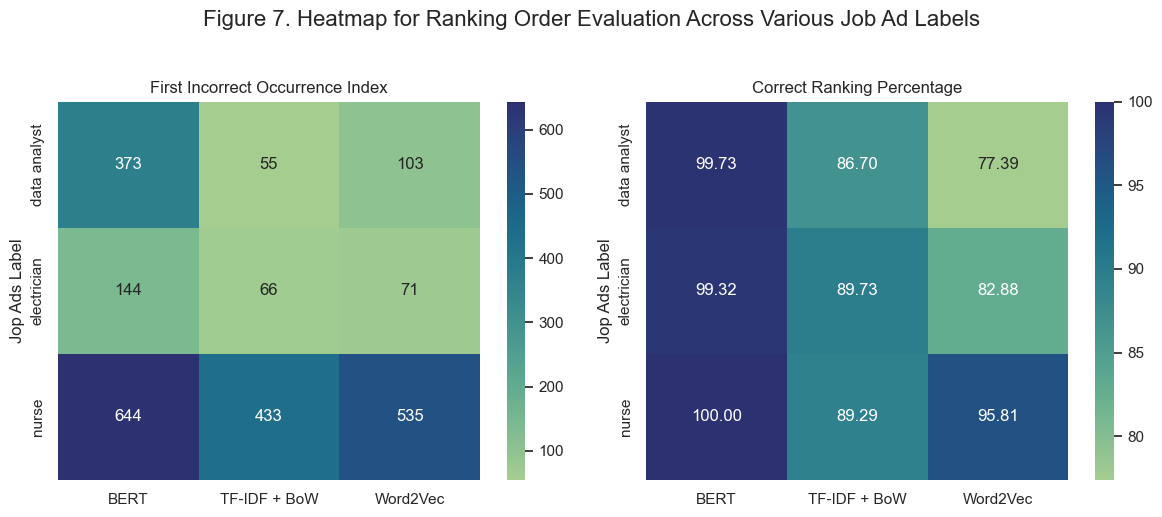

In [35]:
# Re-creating the DataFrame since the execution state was reset and the data was lost.
data = {'Jop Ads Label': ['nurse', 'data analyst', 'electrician', 'nurse', 'data analyst', 'electrician'],
        'Metric': ['First Incorrect Occurrence Index', 'Correct Ranking Percentage']*3,
        'BERT': [644, 99.73404, 144, 100, 373, 99.31507],
        'Word2Vec': [535, 77.39362, 71, 95.80745, 103, 82.87671],
        'TF-IDF + BoW': [433, 86.70213, 66, 89.28571, 55, 89.72603]}

df_heatmap = pd.DataFrame(data)
df_pivot = df_heatmap.pivot_table(index=['Jop Ads Label', 'Metric'], values=['BERT', 'Word2Vec', 'TF-IDF + BoW']).reset_index()
df_first_incorrect = df_pivot[df_pivot['Metric'] == 'First Incorrect Occurrence Index'].set_index('Jop Ads Label')
df_correct_ranking = df_pivot[df_pivot['Metric'] == 'Correct Ranking Percentage'].set_index('Jop Ads Label')
df_first_incorrect.drop('Metric', axis=1, inplace=True)
df_correct_ranking.drop('Metric', axis=1, inplace=True)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df_first_incorrect, annot=True, cmap='crest', fmt='.0f')
plt.title('First Incorrect Occurrence Index')

plt.subplot(1, 2, 2)
sns.heatmap(df_correct_ranking, annot=True, cmap='crest', fmt='.2f')
plt.title('Correct Ranking Percentage')

plt.suptitle('Figure 7. Heatmap for Ranking Order Evaluation Across Various Job Ad Labels', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


*Interpratation:* Overall, the BERT model consistently outperformed Word2Vec and TF-IDF + BoW in ranking order of the job ads accurately across all evaluations for each user, with correct ranking order percentages exceeding 99%. Its superiority highlights BERT's effectiveness in semantic similarity tasks, demonstrating a significant advantage in precision. Word2Vec showed variability and a decrease in accuracy across labels, indicating less consistency in top-ranking relevancy. TF-IDF + BoW, while competitive, also fell short of BERT's performance, especially in early incorrect classifications. Overall, BERT stands out as the most reliable model for precise ranking tasks, underscoring the importance of choosing advanced embedding techniques for tasks requiring high semantic accuracy.

### 4.2 Human evaluation

#### observation

Simply examining the outcomes of model evaluations does not provide sufficient insight to determine the most effective model for this kind of task. It's necessary to incorporate human judgement into the analysis to understand how these rankings reflect practical scenarios. Hence, to draw a definitive conclusion about which embedding technique performs best in real-world applications, human evaluation of the rankings is essential. Previously, we computed cosine scores for each model and assigned rankings from 1 to 3. Through stratified sampling, human evaluation samples were carefully selected from the primary dataset. For every model, 30 job ads were randomly chosen, ensuring an equal distribution across each ranking level. These selected shuffled sets were then forwarded to experiment participants without disclosing the ranking order, providing only job links and a space for rankings. Participants were instructed to visit the job listing websites, review the job details, and assign rankings on a scale of 1 to 3, adhering to a specified ranking logic:

- Rank 1: The job advertisement is not suitable and does not match my desired field.
- Rank 2: The field of the job advertisement corresponds to my interests, but some aspects do not fully fit my professional background or may not entirely meet the company's expectations.
- Rank 3: The job advertisement is in line with my interests, and all the requirements and qualifications match what I am seeking.

In [36]:
df_user1_bert.head()

,link,ranked_cosine,model_ranking,human_ranking
0,https://ie.indeed.com/rc/clk?jk=2d67c79b85d775...,2.573047,2,2
1,https://ie.indeed.com/pagead/clk?mo=r&ad=-6NYl...,2.495149,2,2
2,https://ie.indeed.com/rc/clk?jk=07112f37b00a16...,2.952804,3,3
3,https://ie.indeed.com/rc/clk?jk=bf971c9f771394...,0.068208,1,1
4,https://ie.indeed.com/rc/clk?jk=191bfb67dd0dcd...,2.456883,2,2


After a certain period, the rankings provided by humans were received back and are now prepared for analysis.

***user1 = registered nurse***

In [37]:
# Define a costum function to calculate the count of correct matches for ranks 1, 2, and 3.
def rank_matches(df):
    
    matches = df[df['model_ranking'] == df['human_ranking']]
    return matches['model_ranking'].value_counts().sort_index()

# Calculate rank matches for each model
bert_matches = rank_matches(df_user1_bert)
word2vec_matches = rank_matches(df_user1_word2vec)
tfidf_matches = rank_matches(df_user1_tfidf)

# Create a DataFrame for visualization
rank_match_df = pd.DataFrame({'BERT': bert_matches,
                              'Word2Vec': word2vec_matches,
                              'TF-IDF + BoW': tfidf_matches}).fillna(0)

rank_match_df

,BERT,Word2Vec,TF-IDF + BoW
1,10,10,6
2,6,3,3
3,7,5,5


In [38]:
# Define a costum funtion to calculate the count of incorrect matches for ranks 1, 2, and 3.
def rank_incorrect_matches(df):
    
    incorrect_matches = df[df['model_ranking'] != df['human_ranking']]
    return incorrect_matches['model_ranking'].value_counts().sort_index()

# Calculate incorrect rank matches for each model
bert_incorrect_matches = rank_incorrect_matches(df_user1_bert)
word2vec_incorrect_matches = rank_incorrect_matches(df_user1_word2vec)
tfidf_incorrect_matches = rank_incorrect_matches(df_user1_tfidf)

# Create a DataFrame for visualization of incorrect matches
rank_incorrect_match_df = pd.DataFrame({'BERT': bert_incorrect_matches,
                                        'Word2Vec': word2vec_incorrect_matches,
                                        'TF-IDF + BoW': tfidf_incorrect_matches}).fillna(0).astype(int)

rank_incorrect_match_df

,BERT,Word2Vec,TF-IDF + BoW
1,0,0,4
2,4,7,7
3,3,5,5


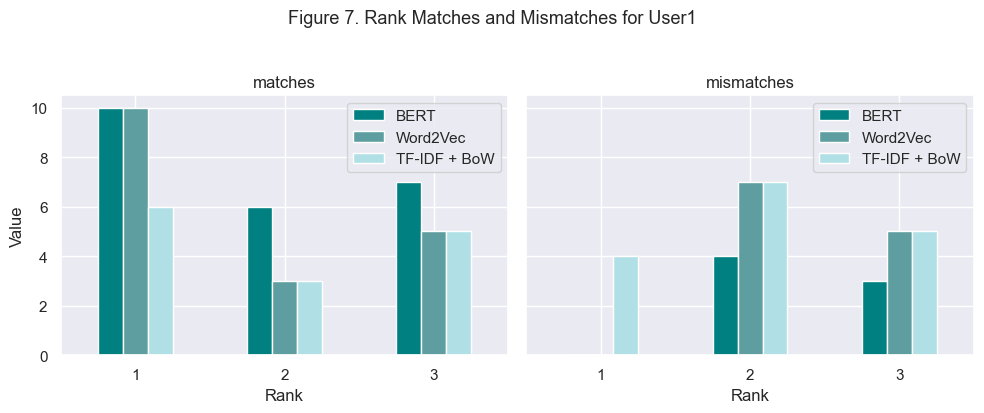

In [39]:
# Plot matches and mismatches for user 1.
colors = {'BERT': 'teal', 'Word2Vec': 'cadetblue', 'TF-IDF + BoW': 'powderblue'}
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
rank_match_df.plot(kind='bar', ax=axes[0], color=[colors['BERT'], colors['Word2Vec'], colors['TF-IDF + BoW']], title='matches')
rank_incorrect_match_df.plot(kind='bar', ax=axes[1], color=[colors['BERT'], colors['Word2Vec'], colors['TF-IDF + BoW']], title='mismatches')

axes[0].set_xlabel('Rank')
axes[0].set_ylabel('Value')
axes[1].set_xlabel('Rank')

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.suptitle('Figure 7. Rank Matches and Mismatches for User1', fontsize=13, y=1.03)
plt.tight_layout()
plt.show()


*Interratation:* From the bar charts and tables detailing the evaluation of user 1, it's evident that the BERT model achieved the most matches, totaling 23 out of 30 rankings. In contrast, the TF-IDF + BoW method had the lowest matches, with 16 out of 30. Word2Vec performed marginally better than TF-IDF + BoW, securing 18 matches out of a total of 30. Both the BERT and Word2Vec models aligned with the participant's rankings on the job ad’s ranking 1.

In [40]:
# Calculate how many times a rank of 3 by the model was ranked as 1 by humans.
def rank_discrepancies_3(df):
    discrepancies = df[(df['model_ranking'] == 3) & (df['human_ranking'] == 1)]
    return discrepancies.shape[0]

# Calculate rank discrepancies for each model
bert_discrepancies = rank_discrepancies_3(df_user1_bert)
word2vec_discrepancies = rank_discrepancies_3(df_user1_word2vec)
tfidf_discrepancies = rank_discrepancies_3(df_user1_tfidf)

print(f'BERT: {bert_discrepancies}\nWord2Vec: {word2vec_discrepancies}\nTF-IDF+BoW: {tfidf_discrepancies}')

BERT: 0
Word2Vec: 0
TF-IDF+BoW: 0


In [41]:
# Calculate how many times a rank of 2 by the model was ranked as 1 by humans.
def rank_discrepancies_2(df):
    discrepancies = df[(df['model_ranking'] == 2) & (df['human_ranking'] == 1)]
    return discrepancies.shape[0]

# Calculate rank discrepancies for each model
bert_discrepancies = rank_discrepancies_2(df_user1_bert)
word2vec_discrepancies = rank_discrepancies_2(df_user1_word2vec)
tfidf_discrepancies = rank_discrepancies_2(df_user1_tfidf)

print(f'BERT: {bert_discrepancies}\nWord2Vec: {word2vec_discrepancies}\nTF-IDF + BoW: {tfidf_discrepancies}')

BERT: 0
Word2Vec: 4
TF-IDF + BoW: 7


*Interpratation:* In the two cells above, the inconsistencies for jobs ranked as 2 and 3 in relation to user evaluations were computed. The findings reveal that job advertisements given a model ranking of 3 were never rated as rank 1 by the user across all models, which is good sign. This indicates that job ads deemed highly suitable by the models were not seen as unsuitable by the user. However, there were discrepancies observed with job ads assigned a model ranking of 2. Specifically, 7 job ads were identified as mismatches for TF-IDF, and 4 job ads ranked by Word2Vec were also seen as mismatches.

***user2 = electrician***

In [42]:
# Calculate rank matches for each model.
bert_matches = rank_matches(df_user2_bert)
word2vec_matches = rank_matches(df_user2_word2vec)
tfidf_matches = rank_matches(df_user2_tfidf)

# Create a DataFrame for visualization.
rank_match_df = pd.DataFrame({'BERT': bert_matches,
                              'Word2Vec': word2vec_matches,
                              'TF-IDF + BoW': tfidf_matches}).fillna(0)

rank_match_df

,BERT,Word2Vec,TF-IDF + BoW
1,10,9,8
2,8,3,6
3,5,6,7


In [43]:
# Calculate incorrect rank matches for each model.
bert_incorrect_matches = rank_incorrect_matches(df_user2_bert)
word2vec_incorrect_matches = rank_incorrect_matches(df_user2_word2vec)
tfidf_incorrect_matches = rank_incorrect_matches(df_user2_tfidf)

# Create a DataFrame for visualization of incorrect matches.
rank_incorrect_match_df = pd.DataFrame({'BERT': bert_incorrect_matches,
                                        'Word2Vec': word2vec_incorrect_matches,
                                        'TF-IDF + BoW': tfidf_incorrect_matches}).fillna(0).astype(int)

rank_incorrect_match_df

,BERT,Word2Vec,TF-IDF + BoW
1,0,1,2
2,2,7,4
3,5,4,3


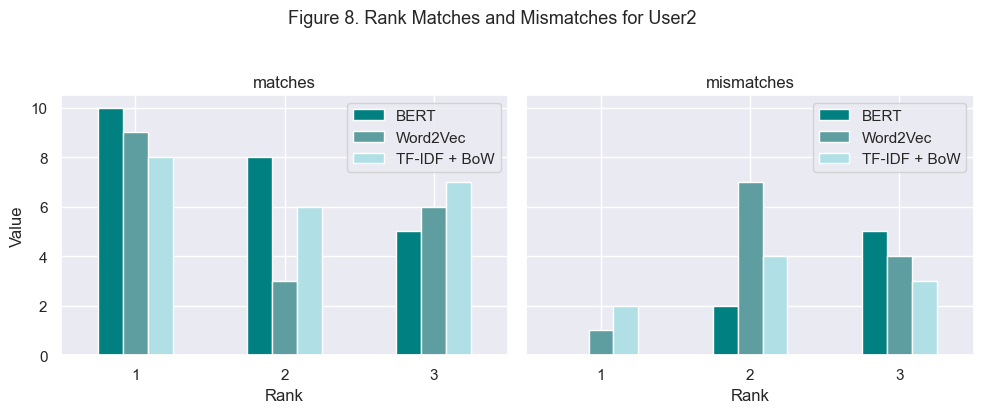

In [44]:
# Plot matches and mismatches for user 2.
colors = {'BERT': 'teal', 'Word2Vec': 'cadetblue', 'TF-IDF + BoW': 'powderblue'}
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
rank_match_df.plot(kind='bar', ax=axes[0], color=[colors['BERT'], colors['Word2Vec'], colors['TF-IDF + BoW']], title='matches')
rank_incorrect_match_df.plot(kind='bar', ax=axes[1], color=[colors['BERT'], colors['Word2Vec'], colors['TF-IDF + BoW']], title='mismatches')

axes[0].set_xlabel('Rank')
axes[0].set_ylabel('Value')
axes[1].set_xlabel('Rank')

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.suptitle('Figure 8. Rank Matches and Mismatches for User2', fontsize=13, y=1.03)
plt.tight_layout()
plt.show()

*Interpretaion:* BERT demonstrates the strongest correlation with human rankings, particularly for the least suitable job ads (rank 1). Word2Vec performs well at rank 1 but shows significant discrepancies at rank 2. TF-IDF + BoW, while having the most matches at rank 3, shows a moderate level of mismatch across all ranks. The data indicates that while all models have their strengths, BERT seems to be the most aligned with human judgment, particularly for low-priority recommendations.

In [45]:
# Calculate how many times a rank of 3 by the model was ranked as 1 by humans.
bert_discrepancies = rank_discrepancies_3(df_user2_bert)
word2vec_discrepancies = rank_discrepancies_3(df_user2_word2vec)
tfidf_discrepancies = rank_discrepancies_3(df_user2_tfidf)

print(f'BERT: {bert_discrepancies}\nWord2Vec: {word2vec_discrepancies}\nTF-IDF+BoW: {tfidf_discrepancies}')


BERT: 0
Word2Vec: 0
TF-IDF+BoW: 0


In [46]:
# Calculate how many times a rank of 2 by the model was ranked as 1 by humans.
bert_discrepancies = rank_discrepancies_2(df_user2_bert)
word2vec_discrepancies = rank_discrepancies_2(df_user2_word2vec)
tfidf_discrepancies = rank_discrepancies_2(df_user2_tfidf)

print(f'BERT: {bert_discrepancies}\nWord2Vec: {word2vec_discrepancies}\nTF-IDF + BoW: {tfidf_discrepancies}')

BERT: 1
Word2Vec: 7
TF-IDF + BoW: 2


*Interpratation:* The inconsistencies for jobs ranked as 2 and 3 in relation to user evaluations were computed for user 2. The findings reveal that job advertisements given a model ranking of 3 were never rated as rank 1 by the user across all models again, which is a good sign. This indicates that job ads deemed highly suitable by the models were not seen as unsuitable by the user. However, there were discrepancies observed with job ads assigned a model ranking of 2. Specifically, 7 job ads were identified as mismatches for Wod2Vec this time, and 2 job ads ranked by TF-IDF + BoW were also seen as mismatches.

***user3 = data analyst***

In [47]:
# Calculate rank matches for each model.
bert_matches = rank_matches(df_user3_bert)
word2vec_matches = rank_matches(df_user3_word2vec)
tfidf_matches = rank_matches(df_user3_tfidf)

# Create a DataFrame for visualization.
rank_match_df = pd.DataFrame({'BERT': bert_matches,
                              'Word2Vec': word2vec_matches,
                              'TF-IDF + BoW': tfidf_matches}).fillna(0)

rank_match_df

,BERT,Word2Vec,TF-IDF + BoW
1,10,7,9
2,9,2,6
3,7,10,9


In [48]:
# Calculate incorrect rank matches for each model.
bert_incorrect_matches = rank_incorrect_matches(df_user3_bert)
word2vec_incorrect_matches = rank_incorrect_matches(df_user3_word2vec)
tfidf_incorrect_matches = rank_incorrect_matches(df_user3_tfidf)

# Create a DataFrame for visualization of incorrect matches.
rank_incorrect_match_df = pd.DataFrame({'BERT': bert_incorrect_matches,
                                        'Word2Vec': word2vec_incorrect_matches,
                                        'TF-IDF + BoW': tfidf_incorrect_matches}).fillna(0).astype(int)

rank_incorrect_match_df

,BERT,Word2Vec,TF-IDF + BoW
1,0,3,1
2,1,8,4
3,3,0,1


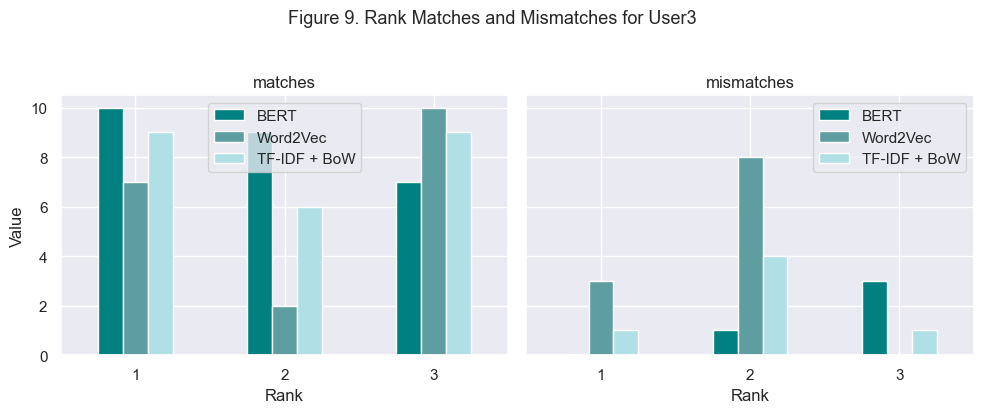

In [49]:
# Plot matches and mismatches for user 3.
colors = {'BERT': 'teal', 'Word2Vec': 'cadetblue', 'TF-IDF + BoW': 'powderblue'}
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
rank_match_df.plot(kind='bar', ax=axes[0], color=[colors['BERT'], colors['Word2Vec'], colors['TF-IDF + BoW']], title='matches')
rank_incorrect_match_df.plot(kind='bar', ax=axes[1], color=[colors['BERT'], colors['Word2Vec'], colors['TF-IDF + BoW']], title='mismatches')

axes[0].set_xlabel('Rank')
axes[0].set_ylabel('Value')
axes[1].set_xlabel('Rank')

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.suptitle('Figure 9. Rank Matches and Mismatches for User3', fontsize=13, y=1.03)
plt.tight_layout()
plt.show()

*Interpretation*: BERT again consistently aligns closely with human rankings, especially for the least suitable job ads (rank 1), and shows few mismatches across all ranks. Word2Vec, while having issues at rank 2, aligns perfectly with human rankings at rank 3, indicating its strength in identifying the most suitable job ads. TF-IDF + BoW demonstrates moderate performance in both matches and mismatches, with a reasonably good alignment in rank 1 matches but more mismatches at rank 2. Each model shows particular strengths at different ranking levels, with BERT being the most reliable overall and Word2Vec distinguishing itself at rank 3.

In [50]:
# Calculate how many times a rank of 3 by the model was ranked as 1 by humans.
bert_discrepancies = rank_discrepancies_3(df_user3_bert)
word2vec_discrepancies = rank_discrepancies_3(df_user3_word2vec)
tfidf_discrepancies = rank_discrepancies_3(df_user3_tfidf)

print(f'BERT: {bert_discrepancies}\nWord2Vec: {word2vec_discrepancies}\nTF-IDF+BoW: {tfidf_discrepancies}')

BERT: 0
Word2Vec: 0
TF-IDF+BoW: 0


In [51]:
# Calculate how many times a rank of 2 by the model was ranked as 1 by humans.
bert_discrepancies = rank_discrepancies_2(df_user3_bert)
word2vec_discrepancies = rank_discrepancies_2(df_user3_word2vec)
tfidf_discrepancies = rank_discrepancies_2(df_user3_tfidf)

print(f'BERT: {bert_discrepancies}\nWord2Vec: {word2vec_discrepancies}\nTF-IDF + BoW: {tfidf_discrepancies}')

BERT: 0
Word2Vec: 8
TF-IDF + BoW: 4


*Interpratation*: For User 3, discrepancies were calculated for job ads that the models ranked as 2 and 3, in comparison to the user's evaluations. The outcomes indicated that jobs ranked as 3 by the models were consistently not rated as 1 by the user, demonstrating alignment at this level of ranking. However, there were again inconsistencies with job ads that the models ranked as 2. In this instance, Word2Vec showed the most significant number of discrepancies with 8, and TF-IDF + BoW followed with 4, indicating a divergence in model and human evaluations for moderately suitable job ads.

***In summary,*** it's apparent that human ranking do not always align with those made by models, though certain models exhibit fewer discrepancies with human rankings than others. Specifically, across all cases studied, the BERT model consistently showed the most accurate performance for the lowest-ranked jobs. However, for advertisements with high and middle rankings, it didn't surpass the other two methods. As it can be seen from the calculations above the jobs ranked as 3 by the models were consistently not ranked as 1 by users in all three instances but the jobs with rank 2 have considerable mismatches with human evaluation.  This suggests that for a content-based job recommendation system, solely relying on positive rankings (rank 2, rank 3) for making recommendations might not be the best strategy, as even the BERT model can sometimes deviate from human evaluations. Therefore, the optimal approach would be to choose the highest ranked job ads from the list of recommendations, and all three models for this purpose can be accepted.

The second key point is that jobs given a ranking of 1 by the models are not suitable for recommendations to users, as this rank indicates the lowest compatibility or highest difference, not only according to the models' evaluations but also reflecting a uniform accuracy across all users. Furthermore, jobs ranked as 1 by the models were never considered as rank 2 or 3 by human evaluators.

### statistic test

#### user1

***Shapiro-Wilk Test***

Observations indicate unresolved questions concerning human evaluation within the dataset, suggesting the necessity for testing to uncover these answers. Before proceeding with comparisons of statistical significance between models and human evaluation, the initial step involves verifying the normal distribution of ranking columns for each model. The Shapiro-Wilk test is selected for application on dataset columns to quantitatively determine normality. Hypotheses for the test are established as follows for each dataset and its corresponding columns:

- $H_0$: The sample data follows a normal distribution.
- $H_A$:  The sample data does not follow a normal distribution.
- $\alpha = 0.05$ (A common significance level value)

In [52]:
# Datasets.
datasets = {'BERT': df_user1_bert,
            'Word2Vec': df_user1_word2vec,
            'TF-IDF + BoW': df_user1_tfidf}

# Function to perform Shapiro-Wilk test and print results.
def test_normality(data, data_label):
    statistic, p_value = shapiro(data)
    print(f'{data_label} Ranking: Shapiro-Wilk W={statistic}, p={p_value}')
    if p_value < 0.05:
        print(f'-- H0 rejected')
    else:
        print(f'-- H0 not rejected')

# Loop through each dataset
for score, df in datasets.items():
    print(f'\n{score}:')
    test_normality(df['model_ranking'], 'Model')
    test_normality(df['human_ranking'], 'Human')



BERT:
Model Ranking: Shapiro-Wilk W=0.7955029010772705, p=5.434526610770263e-05
-- H0 rejected
Human Ranking: Shapiro-Wilk W=0.785822331905365, p=3.655052205431275e-05
-- H0 rejected

Word2Vec:
Model Ranking: Shapiro-Wilk W=0.7955029010772705, p=5.434526610770263e-05
-- H0 rejected
Human Ranking: Shapiro-Wilk W=0.762718677520752, p=1.4718552847625688e-05
-- H0 rejected

TF-IDF + BoW:
Model Ranking: Shapiro-Wilk W=0.7955029010772705, p=5.434526610770263e-05
-- H0 rejected
Human Ranking: Shapiro-Wilk W=0.7853000164031982, p=3.578622636268847e-05
-- H0 rejected


All instances exhibit extremely low p-values and W statistics between 0.76 and 0.80, leading to the rejection of the null hypothesis and the consideration that all variables do not follow a normal distribution

***Spearman's Rank Correlation test***

The confirmation that each variable does not adhere to a normal distribution allows for the implementation of Spearman's Rank Correlation test for every pair to determine the magnitude and direction of the relationship between two ranked variables. The hypothesis for each pair is as follows:

- $H_0$: There is no statistically significant correlation between model ranking and human ranking.
- $H_A$: There is a statistically significant positive correlation between between model ranking and human ranking.
- $\alpha = 0.05$ (A common significance level value)

In [53]:
# Calculate Spearman's Rank Correlation Coefficient for each dataset
spearman_bert = spearmanr(df_user1_bert['model_ranking'], df_user1_bert['human_ranking'])
spearman_word2vec = spearmanr(df_user1_word2vec['model_ranking'], df_user1_word2vec['human_ranking'])
spearman_tfidf = spearmanr(df_user1_tfidf['model_ranking'], df_user1_tfidf['human_ranking'])

def interpret_correlation(rho):
    abs_rho = abs(rho)
    if abs_rho < 0.3:
        return 'weak correlation'
    elif 0.3 <= abs_rho < 0.7:
        return 'moderate correlation'
    else:
        return 'strong correlation'

def print_spearman_results(name, spearman_result):
    statistic, p = spearman_result
    correlation_strength = interpret_correlation(statistic)
    print(f'{name}:')
    print(f'Model Ranking: Spearman rho={statistic:.10f}, p={p:.10f}')
    print(f'-- {correlation_strength}')
    if p < 0.05:
        print('-- H0 rejected ')
    else:
        print('-- H0 not rejected')
    print()

# Print results for each dataset
print_spearman_results('BERT', spearman_bert)
print_spearman_results('Word2Vec', spearman_word2vec)
print_spearman_results('TF-IDF + BoW', spearman_tfidf)

BERT:
Model Ranking: Spearman rho=0.8260331876, p=0.0000000190
-- strong correlation
-- H0 rejected 

Word2Vec:
Model Ranking: Spearman rho=0.7622959014, p=0.0000009819
-- strong correlation
-- H0 rejected 

TF-IDF + BoW:
Model Ranking: Spearman rho=0.6007892413, p=0.0004471693
-- moderate correlation
-- H0 rejected 



Interpretation:

- *BERT*: Rejecting the null hypothesis. The Spearman correlation of 0.826 indicates a strong positive association between the model rankings and human rankings. This suggests that as one ranking increases, the other ranking tends to increase as well. The extremely low p-value (1.90e-08) suggests that this result is statistically significant, meaning there's a very low probability that this strong association is due to chance.

- *Word2Vec*: Rejecting the null hypothesis. The Spearman correlation of 0.762 indicates a strong positive association, though slightly weaker than the BERT model's correlation. The association suggests a tendency for rankings to move together in the same direction. The significance of this correlation is supported by a very low p-value (9.82e-07), indicating that there is a statistically significant monotonic relationship between the variables.

- *TF-IDF + BoW*: The Spearman correlation of 0.601 indicates a moderate positive association between the model rankings and human rankings. While the association is positive, it's not as strong as with the BERT dataset. The low p-value (0.000447) again suggests that this result is statistically significant, implying confidence in the moderate positive relationship observed.

***Wilcoxon Signed-Rank test***

The Spearman test indicated a robust correlation between the BERT and Word2Vec models with human evaluation, while TF-IDF + BoW demonstrated a moderate correlation. Next, an examination of how the medians vary across each model will be conducted to determine if there is statistical significance in these differences.

- $H_0$: The median of ranking scores are the same.
- $H_A$: The median of ranking scores significantly differ from each other.
- $\alpha = 0.05$ (A common significance level value)

In [54]:
def print_wilcoxon_results(name, w_statistic, p_value):
    print(f'{name}:')
    print(f'Wilcoxon Test Statistic={w_statistic}, p={p_value}')
    if p_value < 0.05:
        print('-- H0 rejected\n-- there is a significant difference')
    else:
        print('-- H0 not rejected\n-- no significant difference found')
    print() 

# Perform Wilcoxon signed-rank test for each dataset.
w_statistic_bert, p_value_bert = wilcoxon(df_user1_bert['model_ranking'], df_user1_bert['human_ranking'])
w_statistic_word2vec, p_value_word2vec = wilcoxon(df_user1_word2vec['model_ranking'], df_user1_word2vec['human_ranking'])
w_statistic_tfidf, p_value_tfidf = wilcoxon(df_user1_tfidf['model_ranking'], df_user1_tfidf['human_ranking'])

# Print results for each dataset.
print_wilcoxon_results('BERT', w_statistic_bert, p_value_bert)
print_wilcoxon_results('Word2Vec', w_statistic_word2vec, p_value_word2vec)
print_wilcoxon_results('TF-IDF + BoW', w_statistic_tfidf, p_value_tfidf)


BERT:
Wilcoxon Test Statistic=12.0, p=0.7054569861112734
-- H0 not rejected
-- no significant difference found

Word2Vec:
Wilcoxon Test Statistic=19.5, p=0.0832645166635504
-- H0 not rejected
-- no significant difference found

TF-IDF + BoW:
Wilcoxon Test Statistic=34.0, p=0.04550026389635839
-- H0 rejected
-- there is a significant difference



c:\Users\temulenbd\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\temulenbd\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Interpratation: 

- *BERT*: The high p-value (0.705) suggests that there is no significant difference between the model rankings and human rankings. This indicates that, statistically, the BERT model rankings are similar to human rankings for this dataset.

- *Word2Vec*: The p-value (0.083) is above the conventional threshold of 0.05, indicating that there is no significant difference between the model rankings and human rankings at the 5% significance level. However, being relatively close to the threshold, it suggests there might be a mild difference not strong enough to be considered statistically significant at this level.

- *TF-IDF + BoW*: The p-value (0.046) is just below the conventional threshold of 0.05, indicating a statistically significant difference between the model rankings and human rankings. This suggests that the TF-IDF model rankings differ from human rankings, albeit possibly with a small effect size given the p-value is close to the threshold.

*In summary*, it can be concluded that the BERT and Word2Vec models exhibit a strong correlation with human evaluation and do not show statistical significance in comparison to human rankings. On the other hand, although the TF-IDF + BoW model only shows a moderate correlation, it has been demonstrated to differ significantly from human rankings.

#### user2

***Shapiro-Wilk Test***

In [55]:
# Datasets.
datasets = {'BERT': df_user2_bert,
            'Word2Vec': df_user2_word2vec,
            'TF-IDF + BoW': df_user2_tfidf}

# Loop through each dataset
for score, df in datasets.items():
    print(f'\n{score}:')
    test_normality(df['model_ranking'], 'Model')
    test_normality(df['human_ranking'], 'Human')


BERT:
Model Ranking: Shapiro-Wilk W=0.7955029010772705, p=5.434526610770263e-05
-- H0 rejected
Human Ranking: Shapiro-Wilk W=0.8024078607559204, p=7.255234231706709e-05
-- H0 rejected

Word2Vec:
Model Ranking: Shapiro-Wilk W=0.7955029010772705, p=5.434526610770263e-05
-- H0 rejected
Human Ranking: Shapiro-Wilk W=0.7402429580688477, p=6.358848622767255e-06
-- H0 rejected

TF-IDF + BoW:
Model Ranking: Shapiro-Wilk W=0.7955029010772705, p=5.434526610770263e-05
-- H0 rejected
Human Ranking: Shapiro-Wilk W=0.7955029010772705, p=5.434526610770263e-05
-- H0 rejected


***Spearman's Rank Correlation test***

In [56]:
# Calculate Spearman's Rank Correlation Coefficient for each dataset
spearman_bert = spearmanr(df_user2_bert['model_ranking'], df_user2_bert['human_ranking'])
spearman_word2vec = spearmanr(df_user2_word2vec['model_ranking'], df_user2_word2vec['human_ranking'])
spearman_tfidf = spearmanr(df_user2_tfidf['model_ranking'], df_user2_tfidf['human_ranking'])

# Print results for each dataset
print_spearman_results('BERT', spearman_bert)
print_spearman_results('Word2Vec', spearman_word2vec)
print_spearman_results('TF-IDF + BoW', spearman_tfidf)

BERT:
Model Ranking: Spearman rho=0.8507910785, p=0.0000000026
-- strong correlation
-- H0 rejected 

Word2Vec:
Model Ranking: Spearman rho=0.7802347299, p=0.0000003694
-- strong correlation
-- H0 rejected 

TF-IDF + BoW:
Model Ranking: Spearman rho=0.7000000000, p=0.0000166479
-- strong correlation
-- H0 rejected 



***Wilcoxon Signed-Rank test***

In [62]:
# Perform Wilcoxon signed-rank test for each dataset.
w_statistic_bert, p_value_bert = wilcoxon(df_user2_bert['model_ranking'], df_user2_bert['human_ranking'])
w_statistic_word2vec, p_value_word2vec = wilcoxon(df_user2_word2vec['model_ranking'], df_user2_word2vec['human_ranking'])
w_statistic_tfidf, p_value_tfidf = wilcoxon(df_user2_tfidf['model_ranking'], df_user2_tfidf['human_ranking'])

# Print results for each dataset.
print_wilcoxon_results('BERT', w_statistic_bert, p_value_bert)
print_wilcoxon_results('Word2Vec', w_statistic_word2vec, p_value_word2vec)
print_wilcoxon_results('TF-IDF + BoW', w_statistic_tfidf, p_value_tfidf)

BERT:
Wilcoxon Test Statistic=4.0, p=0.05878172135535886
-- H0 not rejected
-- no significant difference found

Word2Vec:
Wilcoxon Test Statistic=6.5, p=0.003892417122778628
-- H0 rejected
-- there is a significant difference

TF-IDF + BoW:
Wilcoxon Test Statistic=22.5, p=1.0
-- H0 not rejected
-- no significant difference found



c:\Users\temulenbd\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\temulenbd\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


*interpreation*: Each model successfully passed all tests, exhibiting high correlation without any statistically significant differences detected.

#### user3

***Shapiro-Wilk Test***

In [58]:
# Datasets.
datasets = {'BERT': df_user3_bert,
            'Word2Vec': df_user3_word2vec,
            'TF-IDF + BoW': df_user3_tfidf}

# Loop through each dataset
for score, df in datasets.items():
    print(f'\n{score}:')
    test_normality(df['model_ranking'], 'Model')
    test_normality(df['human_ranking'], 'Human')


BERT:
Model Ranking: Shapiro-Wilk W=0.7955029010772705, p=5.434526610770263e-05
-- H0 rejected
Human Ranking: Shapiro-Wilk W=0.807003378868103, p=8.819083450362086e-05
-- H0 rejected

Word2Vec:
Model Ranking: Shapiro-Wilk W=0.7955029010772705, p=5.434526610770263e-05
-- H0 rejected
Human Ranking: Shapiro-Wilk W=0.7101191878318787, p=2.1973805814923253e-06
-- H0 rejected

TF-IDF + BoW:
Model Ranking: Shapiro-Wilk W=0.7955029010772705, p=5.434526610770263e-05
-- H0 rejected
Human Ranking: Shapiro-Wilk W=0.7696154117584229, p=1.9209426682209596e-05
-- H0 rejected


***Spearman's Rank Correlation test***

In [59]:
# Calculate Spearman's Rank Correlation Coefficient for each dataset
spearman_bert = spearmanr(df_user3_bert['model_ranking'], df_user3_bert['human_ranking'])
spearman_word2vec = spearmanr(df_user3_word2vec['model_ranking'], df_user3_word2vec['human_ranking'])
spearman_tfidf = spearmanr(df_user3_tfidf['model_ranking'], df_user3_tfidf['human_ranking'])

# Print results for each dataset
print_spearman_results('BERT', spearman_bert)
print_spearman_results('Word2Vec', spearman_word2vec)
print_spearman_results('TF-IDF + BoW', spearman_tfidf)

BERT:
Model Ranking: Spearman rho=0.9045340337, p=0.0000000000
-- strong correlation
-- H0 rejected 

Word2Vec:
Model Ranking: Spearman rho=0.6961626068, p=0.0000193644
-- moderate correlation
-- H0 rejected 

TF-IDF + BoW:
Model Ranking: Spearman rho=0.8629103136, p=0.0000000009
-- strong correlation
-- H0 rejected 



***Wilcoxon Signed-Rank test***

In [60]:
# Perform Wilcoxon signed-rank test for each dataset.
w_statistic_bert, p_value_bert = wilcoxon(df_user3_bert['model_ranking'], df_user3_bert['human_ranking'])
w_statistic_word2vec, p_value_word2vec = wilcoxon(df_user3_word2vec['model_ranking'], df_user3_word2vec['human_ranking'])
w_statistic_tfidf, p_value_tfidf = wilcoxon(df_user3_tfidf['model_ranking'], df_user3_tfidf['human_ranking'])

# Print results for each dataset.
print_wilcoxon_results('BERT', w_statistic_bert, p_value_bert)
print_wilcoxon_results('Word2Vec', w_statistic_word2vec, p_value_word2vec)
print_wilcoxon_results('TF-IDF + BoW', w_statistic_tfidf, p_value_tfidf)

BERT:
Wilcoxon Test Statistic=2.5, p=0.31731050786291415
-- H0 not rejected
-- no significant difference found

Word2Vec:
Wilcoxon Test Statistic=22.0, p=0.28504940740261275
-- H0 not rejected
-- no significant difference found

TF-IDF + BoW:
Wilcoxon Test Statistic=3.5, p=0.10247043485974941
-- H0 not rejected
-- no significant difference found



*Interpreation*:  Every model passed all evaluations without any statistical differences detected. However, the Word2Vec model demonstrated a moderate correlation, in contrast to the high correlation observed with the other two models.

***Overall,*** the results of statistical and correlation tests indicate that the BERT model consistently aligned closely with human evaluation across all instances, demonstrating highly correlated results with a very low p-value. Similarly, for the Word2Vec model, no statistically significant differences were detected compared to human evaluation. However, for user3, the correlation exhibited moderate results, with a rho score of 0.69, suggesting a detectable but not substantial discrepancy. Regarding the TF-IDF + BoW model, statistical differences were detected for user 1, with a moderate correlation observed. Since the sample size for the job seekers population in this instance comprises only three users, it is not appropriate to extrapolate conclusions to the entire population. Further analysis with a larger number of experiment participants is necessary. The only definitive conclusion here is that model results can vary under different conditions and with different users.